# Actividad 2

 En el archivo [notas-genero.csv](notas-genero.csv), se encuentran almacenados los nombres, nota final y genero de los estudiantes que han cursado una asignatura. Realice lo siguiente (preocúpese de la estética):

    1. Cargue la información de dicho archivo en un dataframe pandas.
    2. Con la información extraída, genere un **histograma** de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar.
    3. Ordene las notas y genere **un gráfico** (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
    4. Genere **dos gráficos de torta** en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.


In [ ]:
# Con files de google colab se elige un archivo desde el escritorio para subirlo y poder trabajar con este
import google.colab.files as fl
fl.upload()

Saving notas-genero.csv to notas-genero.csv


{'notas-genero.csv': b'Nombre\tNota\tGenero\r\nSEBASTI\xc3\x81N ISRAEL\t79\tM\r\nDANIEL ANTONIO\t67\tM\r\nCRISTIAN ALBERTO\t78\tM\r\nMAR\xc3\x8dA GABRIELA\t54\tF\r\nJOS\xc3\x89 ANTONIO\t79\tM\r\nBRAYAN ANDR\xc3\x89S\t75\tM\r\nTOM\xc3\x81S FERNANDO\t68\tM\r\nCHRISTIAN GABRIEL\t76\tM\r\nLUIS FELIPE\t78\tM\r\nOSCAR IGNACIO\t57\tM\r\nCRISTOBAL ALFREDO\t16\tM\r\nMART\xc3\x8dN FELIPE\t68\tM\r\nPAULA BEL\xc3\x89N\t75\tF\r\nMARCELO EDUARDO\t73\tM\r\nMATIAS ALEXIS\t62\tM\r\nNICOL\xc3\x81S FERNANDO\t66\tM\r\nN\xc3\x89STOR FABI\xc3\x81N\t72\tM\r\nLORENS ANDRE\t68\tM\r\nJOSE MANUEL\t85\tM\r\nLILIAN XIMENA\t86\tF\r\nBRYAN FABRICIO\t80\tM\r\nMAT\xc3\x8dAS ANTONIO\t85\tM\r\nCLAUDIO BLAS ARNALDO\t63\tM\r\nHELEN ANNY\t54\tF\r\nVALENTINA BELEN\t86\tF\r\n'}

In [ ]:
# Se importa pandas y se aplica read_csv para en este caso poder leer el archivo, además se incorpora sep='\t',
# es decir se indica que el separador para este archivo en particular es un tabulador
import pandas as pd
df = pd.read_csv('notas-genero.csv', sep='\t')
df

,Nombre,Nota,Genero
0,SEBASTIÁN ISRAEL,79,M
1,DANIEL ANTONIO,67,M
2,CRISTIAN ALBERTO,78,M
3,MARÍA GABRIELA,54,F
4,JOSÉ ANTONIO,79,M
5,BRAYAN ANDRÉS,75,M
6,TOMÁS FERNANDO,68,M
7,CHRISTIAN GABRIEL,76,M
8,LUIS FELIPE,78,M
9,OSCAR IGNACIO,57,M


In [ ]:
# Al ver la información del df, es posible observar que hay 25 filas y 3 culumnas y no contiene datos nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  25 non-null     object
 1   Nota    25 non-null     int64 
 2   Genero  25 non-null     object
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


Text(20, 6, 'Media: 70.0\nDesviación estandar: 14.72')

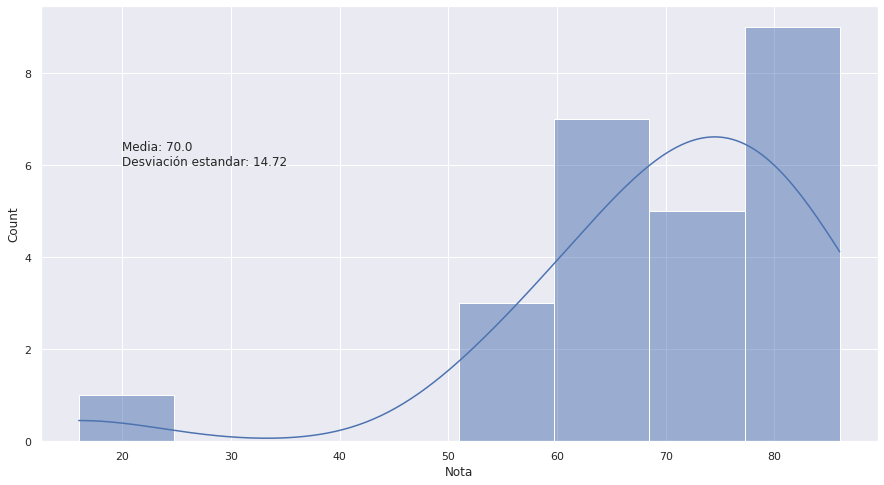

In [ ]:
# Se importan las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# se calcula la media y std para incluirlas en el cuadro de texto
# Se guardan en un string redondeado en 1 y 2 decimales respectivamente con round de numpy
media = str(np.round(df['Nota'].mean(),1))
std =  str(np.round(df['Nota'].std(),2))

# Desde seaborn se establecen parámetros tales como el estilo del gráfico y las dimensiones del mismo
sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})

# hisplot grafica un histograma en formato sns, en donde se le indica que muestre la distribuición de los datos con kde
sns.histplot(x = df['Nota'],kde=True);
# Para  el cuadro de texto al interior es necesario usar pyplot, indicando al menos el texto en cuestión y las coordenads de su ubicación
plt.annotate("Media: "+media+"\nDesviación estandar: "+std, xy=(20,6))



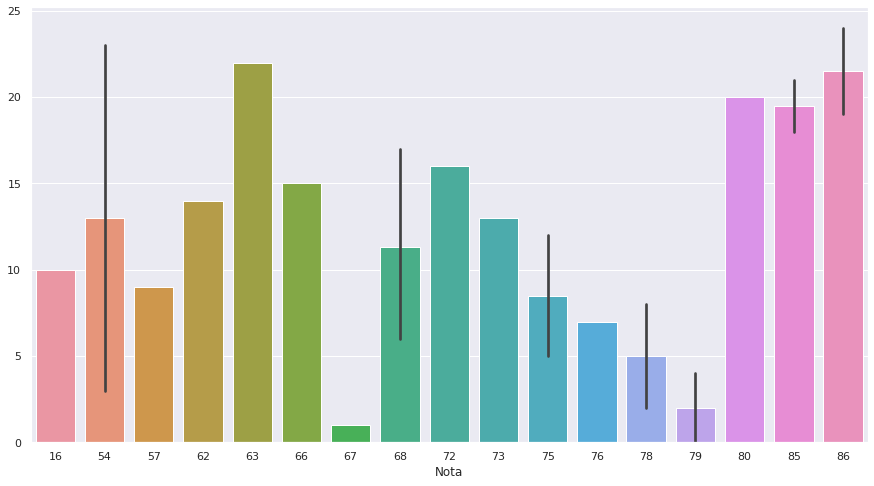

In [ ]:
nasc = df['Nota'].sort_values()
sns.barplot(x=nasc, y=nasc.index)

In [ ]:
# Para los gráficos de torta, es necesario primero crear los filtros que van a distinguir cada porción de estos

# Se distingue entre género y se cuenta la cantidad de repeticiones que hay en la columna género
M = df['Genero'] == 'M'
M_c = df[M]['Genero'].count()
F_c = df[~M]['Genero'].count()

# Para los reprobados se busca diferenciar entre aquellos que tienen una nota igual o superior a 60 y menor o igual para los reprobados
ap = df[df['Nota'] >= 60]['Nota'].count()
re = df[df['Nota'] <= 60]['Nota'].count()

# Se guardan en listas los valores y sus respectivos labels
data1 = [M_c, F_c]
labels1 = ["Hombres","Mujeres"]

data2 = [ap,re]
labels2 = ["Aprobados", "Reprobados"]

([<matplotlib.patches.Wedge at 0x7f627812bdd0>,
 [Text(-0.9639373043865735, 0.5299291209321738, 'Aprobados'),
  Text(1.051567914295663, -0.5781045940172672, 'Reprobados')],
 [Text(-0.5257839842108583, 0.28905224778118566, '84%'),
  Text(0.61341461667247, -0.33722767984340585, '16%')])

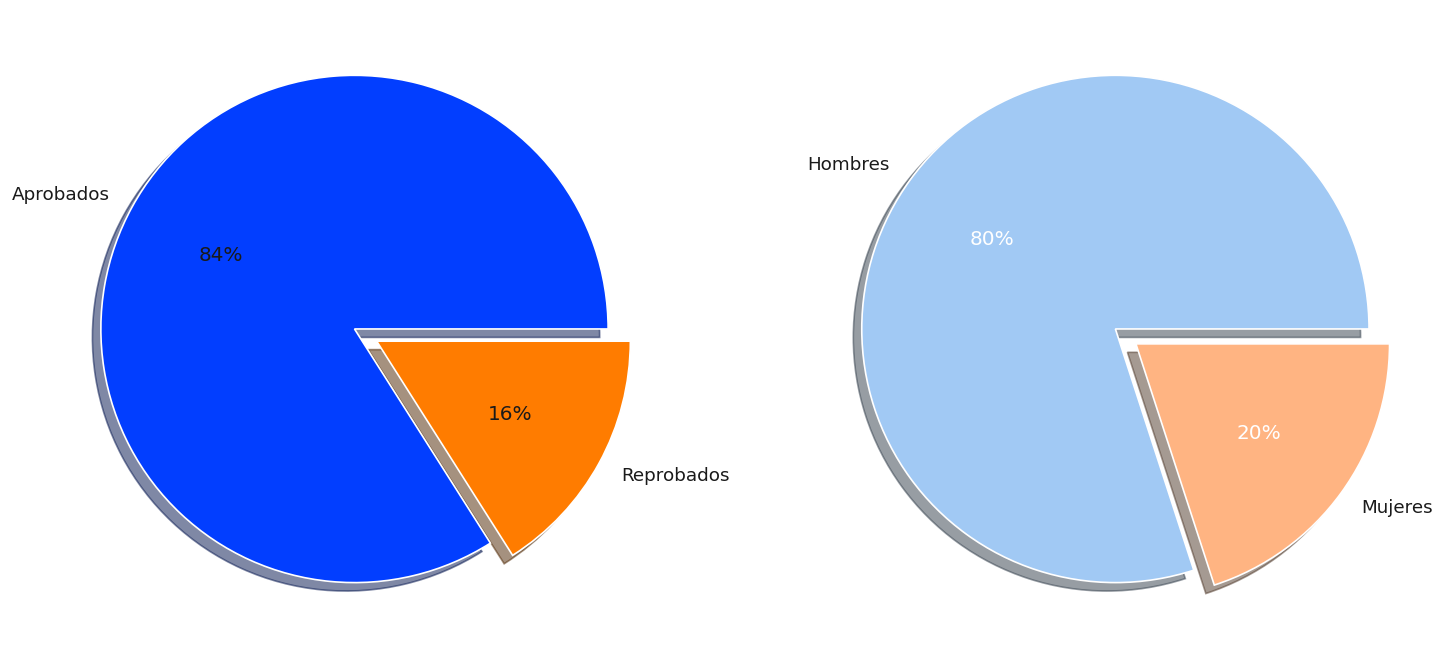

In [ ]:
# Se eligen además desde seaborn paletas de colores en un rango de dos valores debido a la cantidad de porciones del gráfico
colors = sns.color_palette('pastel')[0:2]
colors2 = sns.color_palette('bright')[0:2]

# se crea una figura con un dpi de 120, cabe mencionar el hecho de que si hay subplots, al cambiar el tamaño del dpi, estos podrían visualizarse mejor
fig1 = plt.figure(dpi=120)
# Se añade un subplot de una fila dos columnas, este subplot es el primero de la fila
ax1 = fig1.add_subplot(1,2,1) #1ra fila, 1ra columna, gráfico 1.

wedges, text, autotext = ax1.pie(
                            data1, # Los elementos a graficar, en este caso los valores de la lista data1
                            labels = labels1, # Sus respectivas etiquetas
                            colors = colors, # Y los colores a utilizar
                            autopct='%.0f%%', # Los valores de los labels internos, en este caso, no contienen decimales
                            explode=[0,0.1], # explode separa una o todas las porciones del gráfico a cierta distancia indicada en la lista respectivamente
                            textprops={'color':"k"}, # Los colores de los labels
                            shadow=True) # Se activa el sombreado

# setp (set parameters) de pyplot, otorfa la facultad de ajustar parametros de los elementos del return de ax.pie
# Estos elementos son wedges, text, autotext, los parámetros internos del gráfico, los textos de por ejemplo los labels,
# y las caracteristicas de los textos automáticos (los de autopct) respectivamente
# Para aplicar alguna modificación es necesario mencionarlos antes de 'ax.pie'
plt.setp(autotext, color='white')
# En este caso se indica cambiar el color de los labels internos a blanco


# La segunda figura de los subplots
ax2 = fig1.add_subplot(1,2,2) #1ea fila, 2da columna, gráfico 2.
ax2.pie(data2, labels = labels2, colors = colors2, autopct='%.0f%%', explode=[0,0.1], textprops={'color':"k"}, shadow=True)
